# Explore the data first 

In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_fname = r"../data_staging/all_by_baby_enriched_v3.csv"
df = pd.read_csv(data_fname)

C:\Users\QZ\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First, have a look at the distribution of gestational ages, as this might determine which buckets we use.

count    132110.000000
mean         21.731330
std           9.672369
min        -264.857143
25%          12.857143
50%          21.428571
75%          22.857143
max          42.857143
dtype: float64
Less than 0: 2


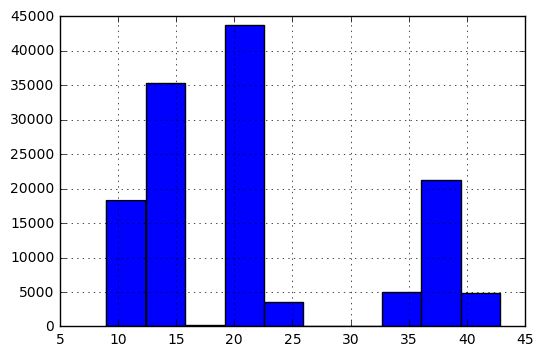

In [2]:
all = pd.concat([df.t1_ga_weeks, df.t2_ga_weeks, df.t3_ga_weeks])
all.dropna(inplace=True)
print all.describe()
print "Less than 0: {}".format(len(all[all < 0]))
all = all[all > 0]
all.hist().plot()
plt.show()

T1
count    53580.000000
mean        12.646065
std          0.636184
min          9.000000
25%         12.142857
50%         12.571429
75%         13.000000
max         14.857143
Name: t1_ga_weeks, dtype: float64
T2
count    47419.000000
mean        21.670214
std          0.673211
min         18.000000
25%         21.428571
50%         21.714286
75%         22.000000
max         24.857143
Name: t2_ga_weeks, dtype: float64
T3
count    31100.000000
mean        37.485002
std          1.672497
min         35.428571
25%         36.142857
50%         36.714286
75%         38.571429
max         42.857143
Name: t3_ga_weeks, dtype: float64


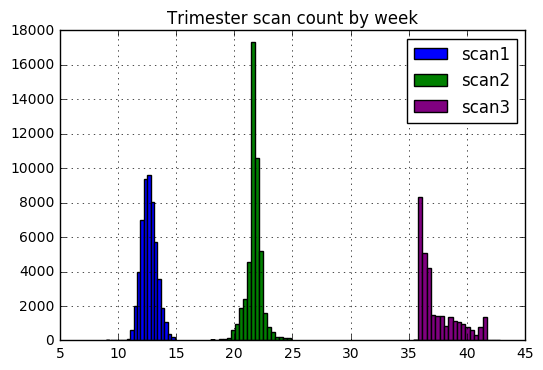

In [3]:
# Look at the trimester scans one by one
t1 = df[df.t1_ga_weeks > 0]
t2 = df[(df.t2_ga_weeks > 0) & (df.t2_ga_weeks < 30)]
t3 = df[(df.t3_ga_weeks >= 30)]

print "T1\n", t1.t1_ga_weeks.describe()
print "T2\n", t2.t2_ga_weeks.describe()
print "T3\n", t3.t3_ga_weeks.describe()

t1.t1_ga_weeks.hist(color="blue", label="scan1", bins=20).plot()
t2.t2_ga_weeks.hist(color="green", label="scan2", bins=20).plot()
t3.t3_ga_weeks.hist(color="purple", label="scan3", bins=20).plot()

plt.title("Trimester scan count by week")
plt.legend()
plt.show()

count    47419.000000
mean        21.670214
std          0.673211
min         18.000000
25%         21.428571
50%         21.714286
75%         22.000000
max         24.857143
Name: t2_ga_weeks, dtype: float64


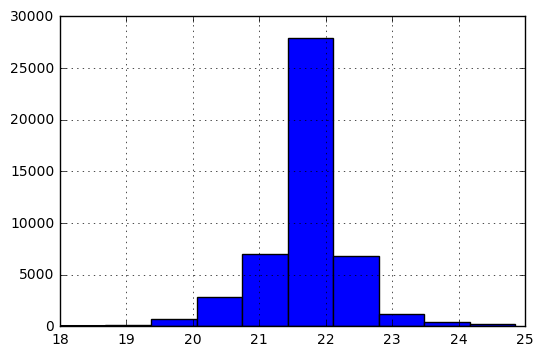

In [4]:
t2 = df[(df.t2_ga_weeks > 0) & (df.t2_ga_weeks < 30)]
print t2.t2_ga_weeks.describe()
t2.t2_ga_weeks.hist().plot()
plt.show()

In [5]:
# Check whether the records we're dropping are actually ok and that we haven't made a mistake somewhere
# print df[df.t2_ga_weeks > 30].iloc[0]

count    31100.000000
mean        37.485002
std          1.672497
min         35.428571
25%         36.142857
50%         36.714286
75%         38.571429
max         42.857143
Name: t3_ga_weeks, dtype: float64
(array([8312, 9246, 2884, 2276, 2501, 1989, 1358, 1100, 1386,   48], dtype=int64), array([ 35.42857143,  36.17142857,  36.91428571,  37.65714286,
        38.4       ,  39.14285714,  39.88571429,  40.62857143,
        41.37142857,  42.11428571,  42.85714286]))


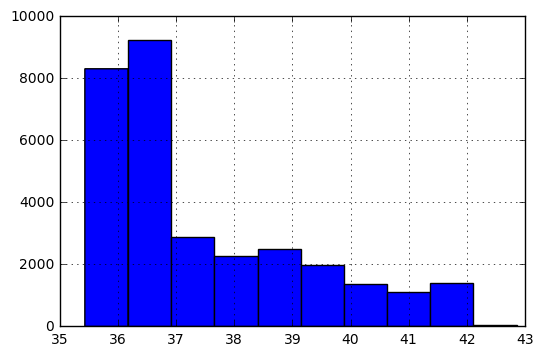

In [6]:
t3 = df[(df.t3_ga_weeks >= 30)]
print t3.t3_ga_weeks.describe()
t3_dist = np.histogram(t3.t3_ga_weeks)
print t3_dist
t3.t3_ga_weeks.hist().plot()
plt.show()

# Investigate the pappa distributions and what range is "reasonable"

Need to be sure what readings can be ignored and which ones are generally in an expected range.
Do some analysis and ask Basky for advice.

It actually looks reasonable if we use a log scale instead, then there aren't so many outliers.

C:\Users\QZ\Anaconda2\lib\site-packages\pandas\core\indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\QZ\Anaconda2\lib\site-packages\pandas\core\indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


count    44166.000000
mean         4.346921
std         70.470921
min          0.044000
25%          1.513000
50%          2.447000
75%          3.920000
max       6881.000000
Name: t1_pappa, dtype: float64
count    44166.000000
mean         0.883139
std          0.719388
min         -3.123566
25%          0.414094
50%          0.894863
75%          1.366092
max          8.836519
Name: t1_pappa_log, dtype: float64


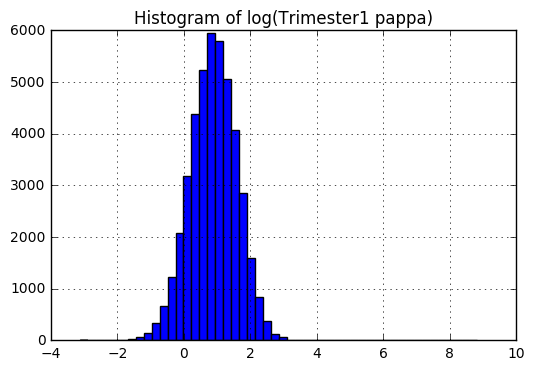

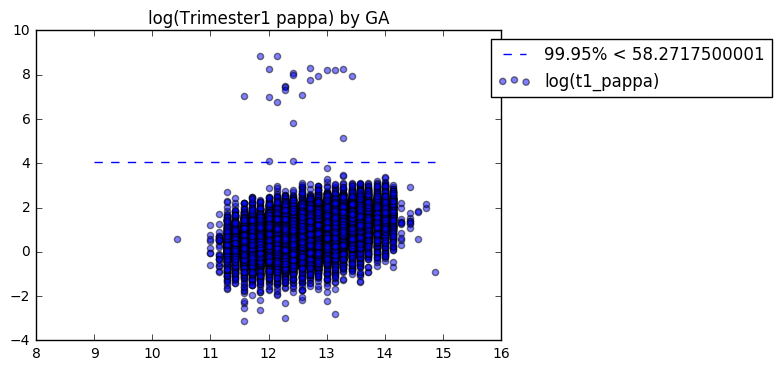

In [7]:
t1.loc[:, "t1_pappa_log"] = np.log(t1.t1_pappa)

print t1.t1_pappa.describe()
print t1.t1_pappa_log.describe()

t1_pappa_threshold = 99.95
pappatv = np.percentile(t1.t1_pappa.dropna().sort_values(), t1_pappa_threshold)

t1.t1_pappa_log.hist(bins=50).plot()
plt.title("Histogram of log(Trimester1 pappa)")
plt.show()

plt.scatter(t1.t1_ga_weeks, t1.t1_pappa_log, alpha=0.5, label="log(t1_pappa)")
plt.plot([t1.t1_ga_weeks.min(), t1.t1_ga_weeks.max()], np.log([pappatv, pappatv]), 
         linestyle="--", label="{}% < {}".format(t1_pappa_threshold, pappatv))
plt.title("log(Trimester1 pappa) by GA")
plt.legend(bbox_to_anchor=(1.6, 1.))
plt.show()

Now look at some basic plots of hormone readings, to see if there are simple looking relationships before we express as multiples of the mean

53580
Hist of pappa>10
(array([775,   4,   3,   1,   4,   5,   0,   0,   0,   2], dtype=int64), array([   10.005 ,   697.1045,  1384.204 ,  2071.3035,  2758.403 ,
        3445.5025,  4132.602 ,  4819.7015,  5506.801 ,  6193.9005,  6881.    ]))
             0
10.0050    775
697.1045     4
1384.2040    3
2071.3035    1
2758.4030    4
3445.5025    5
4132.6020    0
4819.7015    0
5506.8010    0
6193.9005    2
43372
count    43372.000000
mean         2.887589
std          1.871296
min          0.044000
25%          1.500000
50%          2.402000
75%          3.810000
max         10.000000
Name: t1_pappa, dtype: float64


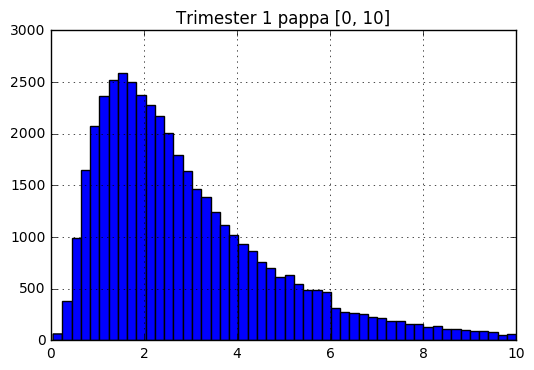

In [9]:
hfields = ["pappa", "b_hcg"]
print len(t1)
t11 = t1[(t1.t1_pappa.map(np.isnan) == False) & (t1.t1_pappa > 0) & (t1.t1_pappa <= 10)]
t12 = t1[t1.t1_pappa > 10]
t12_hist = np.histogram(t12.t1_pappa)
print "Hist of pappa>10"
print t12_hist
print pd.DataFrame(t12_hist[0], index=t12_hist[1][0:-1])
print len(t11)
print t11.t1_pappa.describe()
t11.t1_pappa.hist(bins=50, color="blue").plot()
plt.title("Trimester 1 pappa [0, 10]")
plt.show()

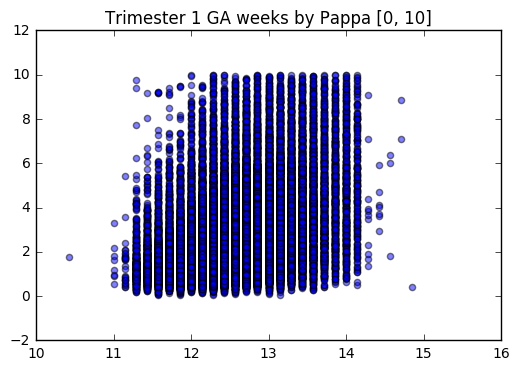

In [10]:
plt.scatter(t11.t1_ga_weeks, t11.t1_pappa, alpha=0.5)
plt.title("Trimester 1 GA weeks by Pappa [0, 10]")
plt.show()

I think the right way to interpret this is that each vertical slice (which is probably a single day) is a distribution, and so (assuming enough data in that slice), we determine the mean of that, then express every other reading in that slice as a multiple of that mean.  
That means that regardless of the actual ga, we now have a pappa MoM which can all be compared, as they are expressed relative to the "normal" reading at that ga.
We do need to think about the number of obs in each slice, and widen if there aren't enough, for example under 11.5 weeks and over 14.
This is where we could also throw in some colours to see whether age and race etc have any effect (which is how the published means are calculated).

It might be interesting to view this as a 3d surface, or a heatmap with the colour denoting density.  Just for interst really, to see how the distribution changes with ga.

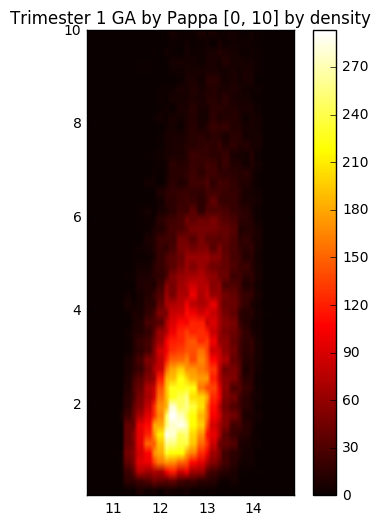

In [11]:
data_rows = []

# Bucket the gestational ages
ga_buckets = np.histogram(t11.t1_ga_weeks, bins=50)[1]


# Use the same buckets for all ga bins, so bucket the total pappa
h_buckets = np.histogram(t11.t1_pappa, bins=50)[1]

# For each ga bucket, get the associated pappa readings
for l, r in zip(ga_buckets[0:-1], ga_buckets[1:]):
    ga_bucket = t11[(t11.t1_ga_weeks >= l) & (t11.t1_ga_weeks < r)]
    if len(ga_bucket) == 0:
        #TODO Want to interpolate ideally, but just use the last row for now
        data_rows.append(data_rows[-1])
    else:
        data_rows.append(ga_bucket.t1_pappa)
data_rows.append(t11[(t11.t1_ga_weeks >= r)].t1_pappa)

# Now calculate histograms of the pappa by ga bucket, so that we have a density for each slice
rows = []
for drow in data_rows:
    rows.append(np.histogram(drow, bins=h_buckets)[0])

# Calc extents for the axes
ga_extents = [t11.t1_ga_weeks.min(), t11.t1_ga_weeks.max()]
pappa_extents = [t11.t1_pappa.min(), t11.t1_pappa.max()]

# Plot the whole lot, sort of a 3d heatmap?
# Transpose the data so we have rows as pappa levels and columns as GA
rows = np.transpose(rows)
fig, ax = plt.subplots(figsize=(5, 6))
im = ax.imshow(rows, extent=ga_extents + pappa_extents, cmap="hot", origin="lower", interpolation="bilinear")
plt.colorbar(im, orientation='vertical')
plt.title("Trimester 1 GA by Pappa [0, 10] by density")
plt.show()

# Pappa distributions by GA

count    4216.000000
mean        2.776642
std         1.718798
min         0.114000
25%         1.522250
50%         2.342000
75%         3.630000
max         9.950000
Name: t1_pappa, dtype: float64


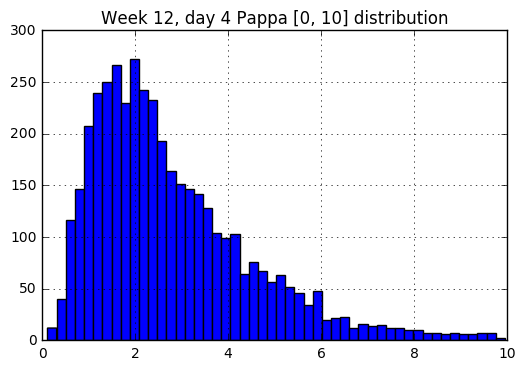

In [12]:
week = 12
d1 = 4
s = t11[(t11.t1_ga_weeks >= (week + d1 / 7.)) & (t11.t1_ga_weeks < (week + (d1 + 1) / 7.))]
print s.t1_pappa.describe()
s.t1_pappa.hist(bins=50).plot()
plt.title("Week {}, day {} Pappa [0, 10] distribution".format(week, d1))
plt.show()

The main observation here is that the mean is not representative of where most of the data lies, because of the skewed nature of the distribution.  
Does it matter? I think so, because a lot of readings will show that they're not near the usual level, which isn't actually the case.

count    4216.000000
mean        0.832125
std         0.637183
min        -2.171557
25%         0.420189
50%         0.851005
75%         1.289233
max         2.297573
Name: t1_pappa, dtype: float64
2.29819755448


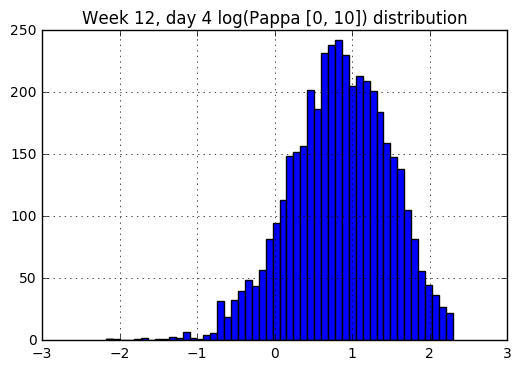

In [13]:
log_s = np.log(s.t1_pappa)
print log_s.describe()
print np.exp(log_s.mean())
# log_hist = np.histogram(log_s, bins=50)
log_s.hist(bins=50).plot()
plt.title("Week {}, day {} log(Pappa [0, 10]) distribution".format(week, d1))
plt.show()

This is showing that if we look at the log of pappa instead, we get something that looks a lot more guassian, and in fact the mean of this distribution translates back into something that visually looks a lot closer to the middle of the original distribution.

# Quick Experiment on Pappa vs Other Variables
Just as a quick experiment, for a single ga slice, are there any obvious correlations between pappa and other variables, like maternal age?

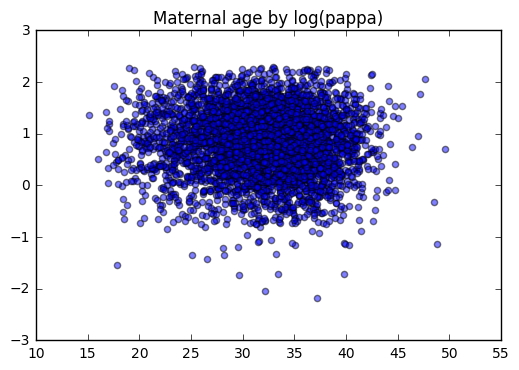

In [14]:
plt.scatter(s.dem_mat_age, log_s, alpha=0.5)
plt.title("Maternal age by log(pappa)")
plt.show()

Doesn't look like it.

# Next Steps

For each of the hormone levels, need to generate a function that normalises a value for a ga, for which we'll need to:
* Sensibly bucket the readings by ga, probably by day (using ga_weeks, should be obvious buckets but will need a minimum number of observations, do some experimentation)
* For each bucket, take logs of the levels and record the mean
* Add new fields to the dataset that use these normalised values